<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/Exercice_4_p91_et_3_p101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data_credit = pd.read_pickle("C:/Users/Tommy/Desktop/Cours master 2 dauphine/Semestre 2/Introduction au machine learning avec Python/Exo 4p93 et 3p101/credit.pkl")
data_credit.head(5)

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16
0,30.83,0.000,1.25,1.0,202.0,0.0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,+
1,58.67,4.460,3.04,6.0,43.0,560.0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,+
2,24.50,0.500,1.50,0.0,280.0,824.0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,+
3,27.83,1.540,3.75,5.0,100.0,3.0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,+
4,20.17,5.625,1.71,0.0,120.0,0.0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,+


In [0]:
data_credit['A16'].loc[(data_credit["A16"]=="+")] = 1
data_credit['A16'].loc[(data_credit["A16"]=="-")] = 0
data_credit.head(5)

C:\Users\Tommy\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16
0,30.83,0.000,1.25,1.0,202.0,0.0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.460,3.04,6.0,43.0,560.0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
2,24.50,0.500,1.50,0.0,280.0,824.0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
3,27.83,1.540,3.75,5.0,100.0,3.0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,20.17,5.625,1.71,0.0,120.0,0.0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,1


Question 1

In [0]:
X = data_credit.drop(['A16'],axis=1)
Y = data_credit['A16']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=1998)

Question 2

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [0]:
#On scale les données pour mettre à l'échelle toutes les variables pour évoter que certaines variables aient
#plus de poids que d'autres

Question 3

In [0]:
from sklearn.svm import SVC
clf = SVC(C=1,kernel='linear')
clf.fit(X_train_scaled,Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Question 4

In [0]:
Y_pred = clf.predict(X_test_scaler)
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.3902439024390244

In [0]:
print("Nombre de mal prédits : ",len(Y_test)-np.sum((Y_test==Y_pred)*1))

Nombre de mal prédits :  25


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[69, 13],
       [12, 70]], dtype=int64)

In [0]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test,Y_pred)
precision

0.8433734939759037

Question 5

In [0]:
clfbis = SVC(C=1.0,kernel='rbf',gamma=1/40,probability=True)
clfbis.fit(X_train_scaled,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Question 6

In [0]:
Y_predbis = clfbis.predict(X_test_scaler)
r2_score(Y_test,Y_predbis)

0.36585365853658536

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_predbis)

array([[73,  9],
       [17, 65]], dtype=int64)

In [0]:
print("Nombre de mal prédits : ",len(Y_test)-np.sum((Y_test==Y_predbis)*1))

Nombre de mal prédits :  26


In [0]:
from sklearn.metrics import precision_score
precisionbis = precision_score(Y_test,Y_predbis)
precisionbis

0.8783783783783784

Question 7

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test,clfbis.predict_proba(X_test_scaler)[:,1])

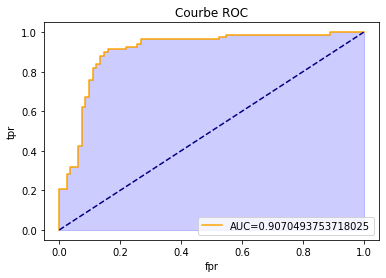

In [0]:
from sklearn.metrics import roc_auc_score, auc
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',label='AUC='+str(auc(fpr,tpr)))
plt.fill_between(fpr,tpr,color='b',alpha=0.2)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.title("Courbe ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc="lower right")
plt.show()

In [0]:
from sklearn.metrics import auc
score_auc = auc(fpr,tpr)
score_auc

0.9070493753718025

Question 8

In [0]:
param_grid = {'C':np.linspace(0.1,10,30),'degree':np.linspace(1,9,30),'gamma':np.linspace(0.01,8,30)}
from sklearn.svm import SVC
svm_clf = SVC(kernel='poly')
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=svm_clf,param_grid=param_grid,scoring='roc_auc',cv=5)
clf.fit(X_train_scaled,Y_train)

C:\Users\Tommy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ]),
                         'degree': array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
       5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
                         'gamma': array([0.01      , 0.89777778, 1.78555556, 2.67333333, 3.56111111,
       4.44888889, 5.33666667, 6.22444444, 7.11222222, 8.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc'

In [0]:
clf.best_params_

{'C': 0.1, 'degree': 1.0, 'gamma': 0.01}

Question 9

In [0]:
clfter = SVC(C=0.1,kernel='rbf',degree=1,gamma=0.01,probability=True)
clfter.fit(X_train_scaled,Y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
Y_predter = clfter.predict(X_test_scaler)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_predter)

array([[72, 10],
       [15, 67]], dtype=int64)

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test,clfter.predict_proba(X_test_scaler)[:,1])

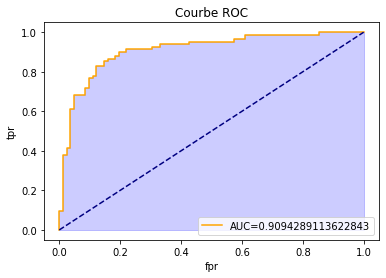

In [0]:
from sklearn.metrics import roc_auc_score, auc
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',label='AUC='+str(auc(fpr,tpr)))
plt.fill_between(fpr,tpr,color='b',alpha=0.2)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.title("Courbe ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc="lower right")
plt.show()

In [0]:
from sklearn.metrics import auc
score_auc = auc(fpr,tpr)
print("AUC : ",score_auc)

AUC :  0.9094289113622843


**Exercice 3p101**

Question 1

In [0]:
data_insurance = pd.read_pickle("C:/Users/Tommy/Desktop/Cours master 2 dauphine/Semestre 2/Introduction au machine learning avec Python/Exo 4p93 et 3p101/insurance.pkl")
data_insurance.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [0]:
X = data_insurance.drop(['charges'],axis=1)
Y = data_insurance['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=2003)

Question 2

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

Question 3

In [0]:
from sklearn.svm import SVR
SVMR = SVR(kernel='linear', C=200,gamma=0.08, epsilon=1)
SVMR.fit(X_train_scal,Y_train)

SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.08,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Question 4

In [0]:
Y_pred = SVMR.predict(X_test_scal)
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.746032637386953

Question 5

In [0]:
SVMRPOLY = SVR(kernel='poly', C=800,degree=3, epsilon=1)
SVMRPOLY.fit(X_train_scal,Y_train)

SVR(C=800, cache_size=200, coef0=0.0, degree=3, epsilon=1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

QUestion 6

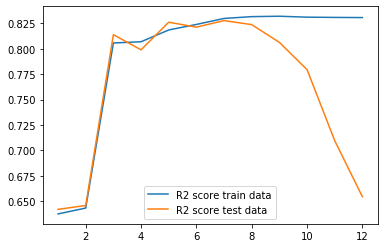

In [0]:
r2train = []
r2test = []
for i in range(1,13):
    SVMR = SVR(kernel='poly', C=800,degree=i, epsilon=1)
    SVMR.fit(X_train_scal,Y_train)
    
    r2train.append(r2_score(Y_train, SVMR.predict(X_train_scal)))

    r2test.append(r2_score(Y_test,SVMR.predict(X_test_scal)))

plt.plot(np.arange(1,13,1),r2train,label="R2 score train data");
plt.plot(np.arange(1,13,1),r2test,label="R2 score test data");
plt.legend(loc=8);
  
    
  